# 1. Points generator

In [1]:
from components.points_generator import PointsGenerator

# For testing you can limit the points to 50 :D
pg = PointsGenerator(n_points=100)
pg.generate_points()

In [2]:
# get each attribute:
pg.generated_points
# pg.demand_df
# pg.supply_df
# pg.magazines_points
# pg.distances

{0: {'coords': (200, 150), 'point_type': 'supply'},
 1: {'coords': (124, 133), 'point_type': 'demand'},
 2: {'coords': (131, 165), 'point_type': 'supply'},
 3: {'coords': (112, 151), 'point_type': 'supply'},
 4: {'coords': (139, 128), 'point_type': 'demand'},
 5: {'coords': (181, 151), 'point_type': 'supply'},
 6: {'coords': (118, 170), 'point_type': 'demand'},
 7: {'coords': (126, 185), 'point_type': 'demand'},
 8: {'coords': (163, 188), 'point_type': 'demand'},
 9: {'coords': (171, 172), 'point_type': 'supply'},
 10: {'coords': (185, 115), 'point_type': 'demand'},
 11: {'coords': (107, 124), 'point_type': 'demand'},
 12: {'coords': (111, 122), 'point_type': 'demand'},
 13: {'coords': (193, 180), 'point_type': 'magazine'},
 14: {'coords': (145, 150), 'point_type': 'demand'},
 15: {'coords': (152, 119), 'point_type': 'demand'},
 16: {'coords': (166, 155), 'point_type': 'demand'},
 17: {'coords': (143, 123), 'point_type': 'supply'},
 18: {'coords': (198, 184), 'point_type': 'demand'},
 

# 2. VRP Algorithm

In [3]:
from components.vrp_algorithm import VRPAlgorithm
from components.ga_components import *

# Instantiate the VRPAlgorithm object with some parameters...
# Here you can also limit the iterations for testing purposes
vrp = VRPAlgorithm(population_size=20, n_iterations=100,
selector=TournamentSelector(0.35), crossover=PMXCrossover(0.85), mutator=InverseMutator(0.025))

In [4]:
# learn...
vrp.learn(pg)

Starting algorithm...
Iteration: 0.                 Result: 13115.141111405326
Iteration: 5.                 Best result: 12427.64391372764
Iteration: 10.                 Best result: 11938.669301123053
Iteration: 15.                 Best result: 11893.183596860732
Iteration: 20.                 Best result: 11825.23598662902
Iteration: 25.                 Best result: 11100.302332547453
Iteration: 30.                 Best result: 11100.302332547453
Iteration: 35.                 Best result: 11100.302332547453
Iteration: 40.                 Best result: 11100.302332547453
Iteration: 45.                 Best result: 11100.302332547453
Iteration: 50.                 Best result: 11030.146003579195
Iteration: 55.                 Best result: 10964.901353797612
Iteration: 60.                 Best result: 10964.901353797612
Iteration: 65.                 Best result: 10964.901353797612
Iteration: 70.                 Best result: 10964.901353797612
Iteration: 75.                 Best result

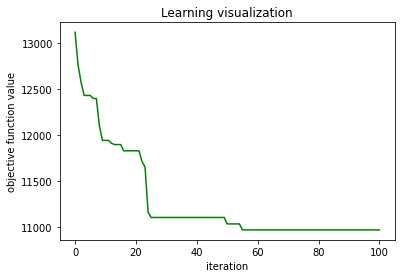

In [5]:
# Visualize the learning curves...
vrp.learning_visualization

In [6]:
# A one-row pandas df that contains dictionaries with the best routes for each product within each task
# demand_routes - we deliver there
# supply_routes - we pickup from there
# each product represent one car, so we have 6 cars in total
vrp.best_paths

,demand_routes,supply_routes
0,"{'Tuna': [4, 25, 72, 76, 51, 35, 91, 74, 90, 5...","{'Tuna': [0, 20, 96, 77, 45, 97, 99, 68, 2, 44..."


In [7]:
# EXAMPLE: how to get the route for Uran, from the supply_routes
# 0 because always only one row
vrp.best_paths['supply_routes'][0]['Uran']

[0,
 20,
 96,
 77,
 45,
 97,
 99,
 68,
 2,
 44,
 52,
 85,
 5,
 55,
 80,
 65,
 84,
 41,
 19,
 36,
 39,
 0,
 94,
 9,
 64,
 23,
 17,
 32,
 43,
 46,
 42,
 54,
 83,
 49,
 3,
 31,
 81,
 89]

In [8]:
# :)
vrp.ile_janusz_zaoszczedzil

Gdyby Janusz na łoko (na łoko to jeden umar)
            wyznaczał trasy swoich ciężarówek, to by zrobiły
            one 13115.14 km. Czyli przy łobecnych cenach dizla,
            śr. 6.50 zł i średnim spalaniu dostawczaka 13l.,
            to by wydoł 85248.42 zł na paliwo. Kurła!
Gdyby Janusz się nos posłuchoł i kupił nosz pakiet
            maszin lerningowy, to by jego ciężarówki zrobiły
            10964.9 km, czyli o 2150.24 km
            mniej! Janusz by załoszczędził
            13976.56 zł! Kurła!
